# Lab 4

In [1]:
!pip install pywaffle

     |████████████████████████████████| 532kB 6.2MB/s 


In [2]:
import numpy as np
import pandas as pd
from pywaffle import Waffle
import matplotlib.pyplot as plt

In [3]:
data_url = 'https://python-graph-gallery.com/wp-content/uploads/gapminderData.csv'
df = pd.read_csv(data_url)
df.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


# Waffle Chart

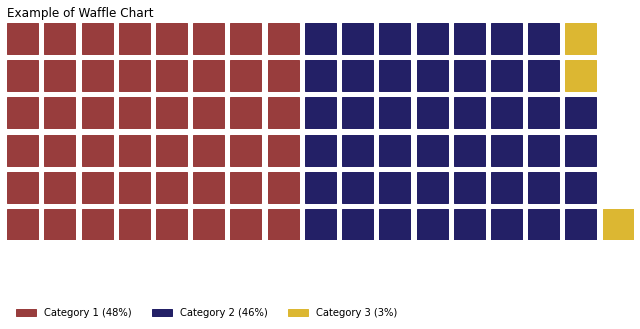

In [9]:
data = {'Category 1': 48, 'Category 2': 46, 'Category 3': 3}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=6,
    values=data, 
    colors=("#983D3D", "#232066", "#DCB732"),
    title={'label': 'Example of Waffle Chart', 'loc': 'left'},
    labels=["{0} ({1}%)".format(k, v) for k, v in data.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
    figsize=(9, 6)
)
plt.show()

# Waffle Chart is a Custom Figure

In [10]:
from matplotlib.figure import Figure


class CustomFigure(Figure):
    def __init__(self, *args, figtitle='custom title', **kwargs):
        super().__init__(*args, **kwargs)
        self.text(0.5, 0.95, figtitle, ha='center')

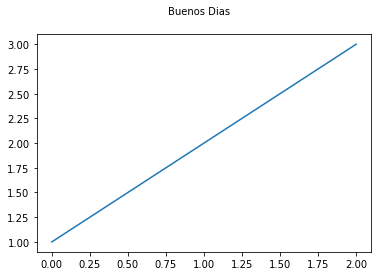

In [11]:
fig = plt.figure(FigureClass=CustomFigure, figtitle='Buenos Dias')
ax = fig.subplots()
ax.plot([1, 2, 3])
plt.show()

# Exercise 1

Create a waffle chart with population for each continent in year 2007

In [16]:
data = df.groupby("continent")["pop"].sum()
data = round(data / data.sum() *100, 2)
data = data.to_dict()

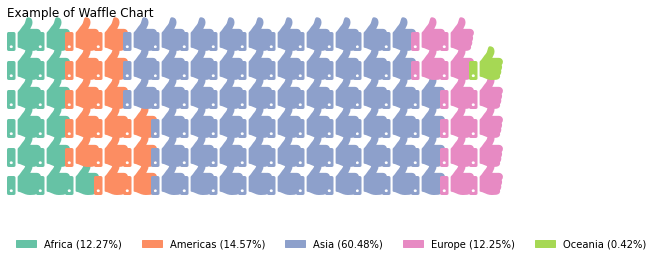

In [21]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=6,
    values=data, 
    title={'label': 'Example of Waffle Chart', 'loc': 'left'},
    labels=["{0} ({1}%)".format(k, v) for k, v in data.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
    figsize=(9, 6),
    icons="thumbs-up"
)
plt.show()

# Word Cloud

In [22]:
!pip install git+https://github.com/amueller/word_cloud

  Cloning https://github.com/amueller/word_cloud to /tmp/pip-req-build-cbxcufhz
  Running command git clone -q https://github.com/amueller/word_cloud /tmp/pip-req-build-cbxcufhz
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp36-cp36m-linux_x86_64.whl size=332729 sha256=ff3f3130ab7a8baeea4759c7967b63c99ea0fcd1a9825ea4a02f3c1c0411b842
  Stored in directory: /tmp/pip-ephem-wheel-cache-9gnxp6we/wheels/67/8f/e6/55f9cc62ad314bff5f3fec66e2a3c15a5e231cce7580989356
Successfully built wordcloud
  Found existing installation: wordcloud 1.5.0
    Uninstalling wordcloud-1.5.0:
      Successfully uninstalled wordcloud-1.5.0


In [23]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [24]:
from wordcloud import WordCloud, STOPWORDS

In [25]:
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/alice_novel.txt

In [26]:
text = open('./alice_novel.txt', encoding="utf-8").read()

In [27]:
text

'\ufeffProject Gutenberg\'s Alice\'s Adventures in Wonderland, by Lewis Carroll\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: Alice\'s Adventures in Wonderland\n\nAuthor: Lewis Carroll\n\nPosting Date: June 25, 2008 [EBook #11]\nRelease Date: March, 1994\n[Last updated: December 20, 2011]\n\nLanguage: English\n\n\n*** START OF THIS PROJECT GUTENBERG EBOOK ALICE\'S ADVENTURES IN WONDERLAND ***\n\n\n\n\n\n\n\n\n\n\nALICE\'S ADVENTURES IN WONDERLAND\n\nLewis Carroll\n\nTHE MILLENNIUM FULCRUM EDITION 3.0\n\n\n\n\nCHAPTER I. Down the Rabbit-Hole\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conversations in\nit, \'and w

In [39]:
stopwords = set(STOPWORDS)
stopwords.add("said")

In [40]:
wc = WordCloud(background_color="white", max_words=2000,
               stopwords=stopwords, contour_width=3, contour_color='steelblue', collocations=False)
wc.generate(text)

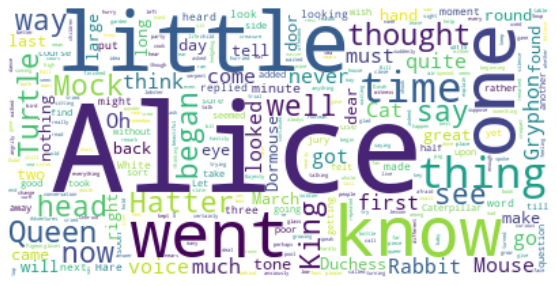

In [41]:
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [44]:
import re
def getFrequencyDictForText(sentence):
    fullTermsDict = {}
    tmpDict = {}

    # making dict for counting frequencies
    for text in sentence.split(" "):
        if re.match("a|the|an|the|to|in|for|of|or|by|with|is|on|that|be", text):
            continue
        val = tmpDict.get(text, 0)
        tmpDict[text.lower()] = val + 1
    for key in tmpDict:
        fullTermsDict[key] = tmpDict[key]
    return fullTermsDict

In [46]:
text_dict = getFrequencyDictForText(text)
text_dict
wc.generate_from_frequencies(text_dict)

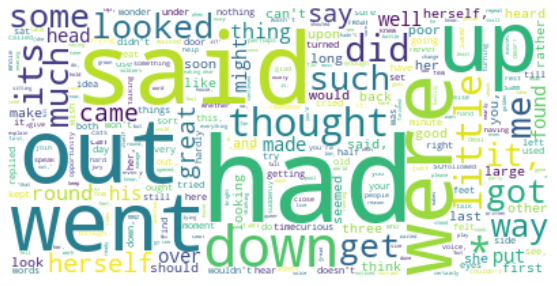

In [47]:
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [48]:
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/alice_mask.png

In [53]:
alice_mask = np.array(Image.open('alice_mask.png'))
np.unique(alice_mask)

array([  0, 255], dtype=uint8)

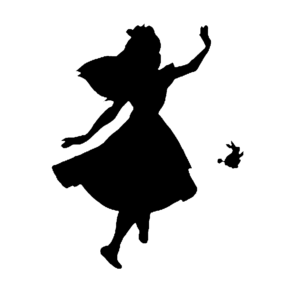

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [54]:
wc = WordCloud(background_color="white", max_words=2000, mask=alice_mask,
               stopwords=stopwords)
wc.generate_from_frequencies(text_dict)

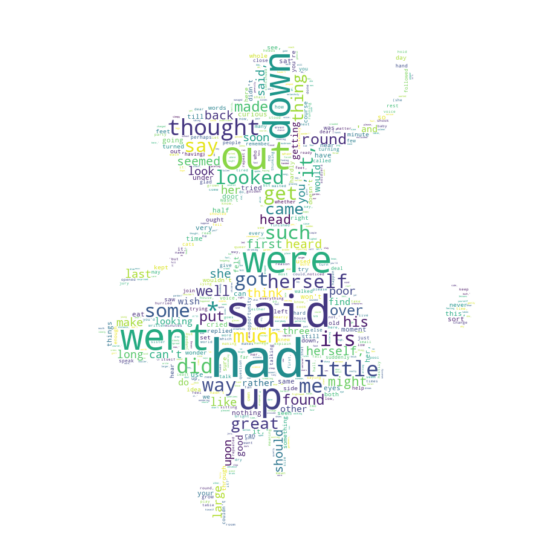

In [55]:
plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [57]:
!wget https://img.pokemondb.net/artwork/large/pikachu.jpg

--2020-12-12 12:41:08--  https://img.pokemondb.net/artwork/large/pikachu.jpg
Resolving img.pokemondb.net (img.pokemondb.net)... 104.26.4.191, 104.26.5.191, 172.67.69.138, ...
Connecting to img.pokemondb.net (img.pokemondb.net)|104.26.4.191|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82920 (81K) [image/jpeg]
Saving to: ‘pikachu.jpg’

pikachu.jpg         100%[===================>]  80.98K  --.-KB/s    in 0.02s   

2020-12-12 12:41:08 (4.93 MB/s) - ‘pikachu.jpg’ saved [82920/82920]



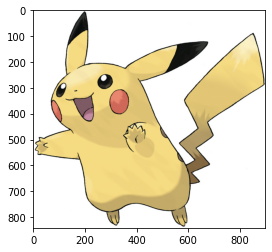

In [58]:
image = np.array(Image.open("pikachu.jpg"))
plt.imshow(image)

In [59]:
from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(image, default_color=(0,0,0))
wc = WordCloud(background_color="white", max_words=2000, mask=image,
               stopwords=stopwords)
wc.generate_from_frequencies(text_dict)

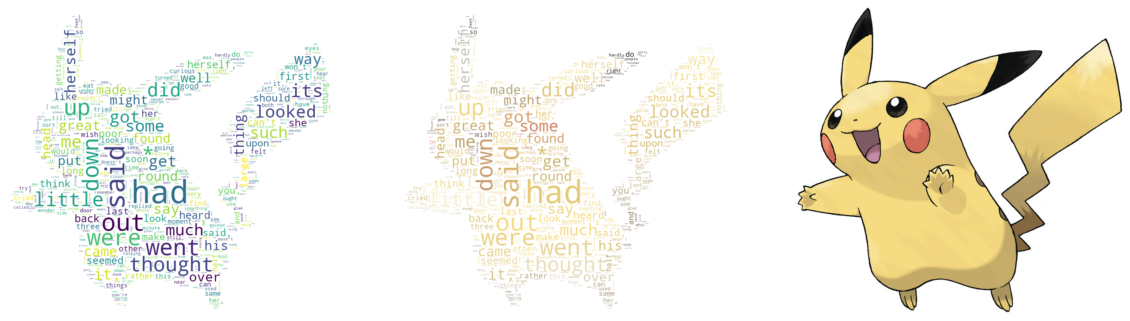

In [60]:
fig, axes = plt.subplots(1, 3, figsize=(20,15))
axes[0].imshow(wc, interpolation="bilinear")
axes[1].imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
axes[2].imshow(image, cmap=plt.cm.gray, interpolation="bilinear")
for ax in axes:
    ax.set_axis_off()
plt.show()

# Exercise 2

Create a word cloud showing the most populated countries in a year

In [63]:
df2 = df[df.year == 2007]
df2.set_index("country", inplace=True)
df2.head()

,year,pop,continent,lifeExp,gdpPercap
country,,,,,
Afghanistan,2007,31889923.0,Asia,43.828,974.580338
Albania,2007,3600523.0,Europe,76.423,5937.029526
Algeria,2007,33333216.0,Africa,72.301,6223.367465
Angola,2007,12420476.0,Africa,42.731,4797.231267
Argentina,2007,40301927.0,Americas,75.320,12779.379640


In [68]:
wc = WordCloud(background_color="white", max_words=2000,
               stopwords=stopwords)
wc.generate_from_frequencies(df2.loc[:, "pop"].to_dict())

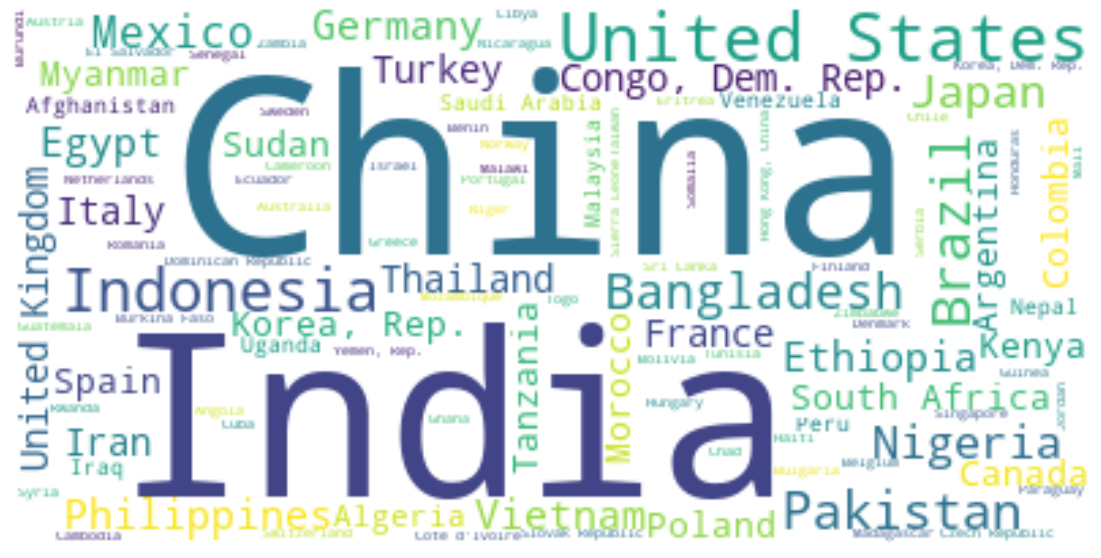

In [69]:
plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [70]:
poblacion_total = df2["pop"].sum()
text = ""
max_palabras = 1000
for country in df2.index.values:
    if len(country.split(" ")) > 1:
        country_name = "".join(country.split(" "))
    else:
        country_name = country
    x = int(max_palabras * df2.loc[country, "pop"] / poblacion_total)
    text += x * (country_name + " ")

In [71]:
text

"Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Algeria Algeria Algeria Algeria Algeria Angola Argentina Argentina Argentina Argentina Argentina Argentina Australia Australia Australia Austria Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Belgium Benin Bolivia Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Bulgaria BurkinaFaso BurkinaFaso Burundi Cambodia Cambodia Cameroon Cameroon Canada Canada Canada Canada Canada Chad Chile Chile China China China China China China China China China China China China China China China China China China China China China China China China China China China China C

In [74]:
wc = WordCloud(background_color="white", max_words=2000,
               stopwords=stopwords, collocations=False)
wc.generate(text)

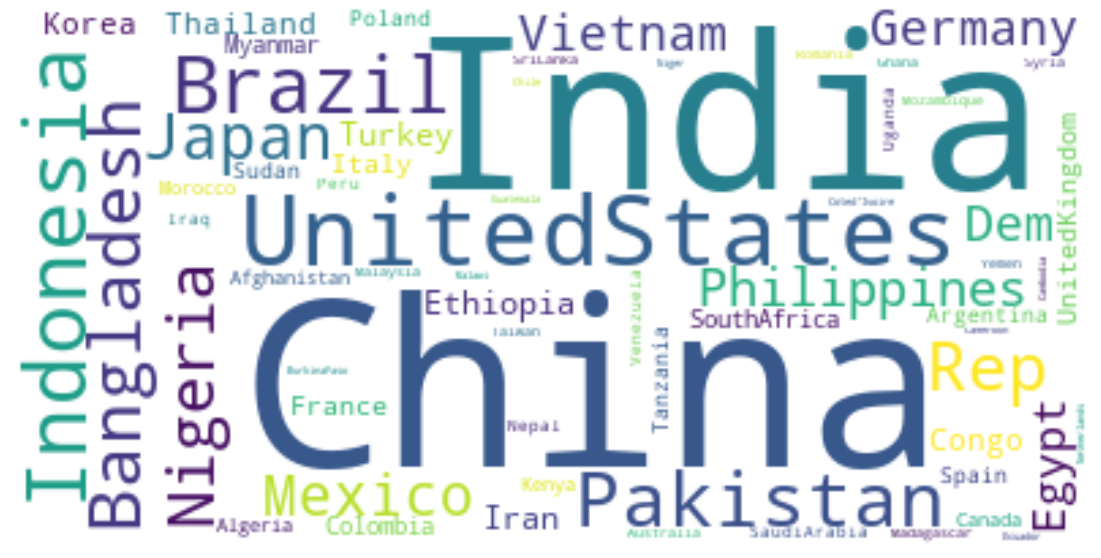

In [75]:
plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# Heatmap

In [76]:
import plotly.graph_objects as go

In [77]:
fig = go.Figure(data=go.Heatmap(
                   z=[[1, 20, 30, 50, 1], [20, 1, 60, 80, 30], [30, 60, 1, -10, 20]],
                   x=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
                   y=['Morning', 'Afternoon', 'Evening']))
fig.show()

In [78]:
data = pd.DataFrame({"z":[1,2,3,4,5,6], 
                     "x":["first", "first", "second", "second", "third", "third"],
                     "y":["dog","cat", "dog", "cat", "dog", "cat"]})
data

,z,x,y
0,1,first,dog
1,2,first,cat
2,3,second,dog
3,4,second,cat
4,5,third,dog
5,6,third,cat


In [ ]:
fig = go.Figure(data=go.Heatmap(
                   z=data.z,
                   x=data.x,
                   y=data.y))
fig.show()

# Exercise 3 

Create a heatmap with life expectancy by year for each country in América

In [ ]:
df2 = df[df.continent == "Americas"]
df2.head()

,country,year,pop,continent,lifeExp,gdpPercap
48,Argentina,1952,17876956.0,Americas,62.485,5911.315053
49,Argentina,1957,19610538.0,Americas,64.399,6856.856212
50,Argentina,1962,21283783.0,Americas,65.142,7133.166023
51,Argentina,1967,22934225.0,Americas,65.634,8052.953021
52,Argentina,1972,24779799.0,Americas,67.065,9443.038526


In [ ]:
fig = go.Figure(data=go.Heatmap(
                   z=df2.lifeExp,
                   x=df2.year,
                   y=df2.country))
fig.show()